## Modelling

In [1]:
library('nlme')
library('lme4')
library('lattice')
library('gridExtra')
library('scales')
library('pROC')

Loading required package: Matrix

Attaching package: ‘lme4’

The following object is masked from ‘package:nlme’:

    lmList

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



## GLM

In [3]:
df = read.csv(file = 'gameplay_data_total.csv',header = T)

In [4]:
log_energy = log(df$energy,2)
avg_amp = scale(df$avg_amp)
max_amp = scale(df$max_amp)
energy = scale(df$energy)
sids = as.numeric(df$sampID)

In [5]:
temp = cbind(avg_amp,energy,max_amp,log_energy)
colnames(temp) = c('avg_amp', 'energy', 'max_amp', 'log_energy')
cor(temp)

,avg_amp,energy,max_amp,log_energy
avg_amp,1.0000000,0.9941658,0.5284487,0.8247906
energy,0.9941658,1.0000000,0.5428230,0.8378286
max_amp,0.5284487,0.5428230,1.0000000,0.4969562
log_energy,0.8247906,0.8378286,0.4969562,1.0000000


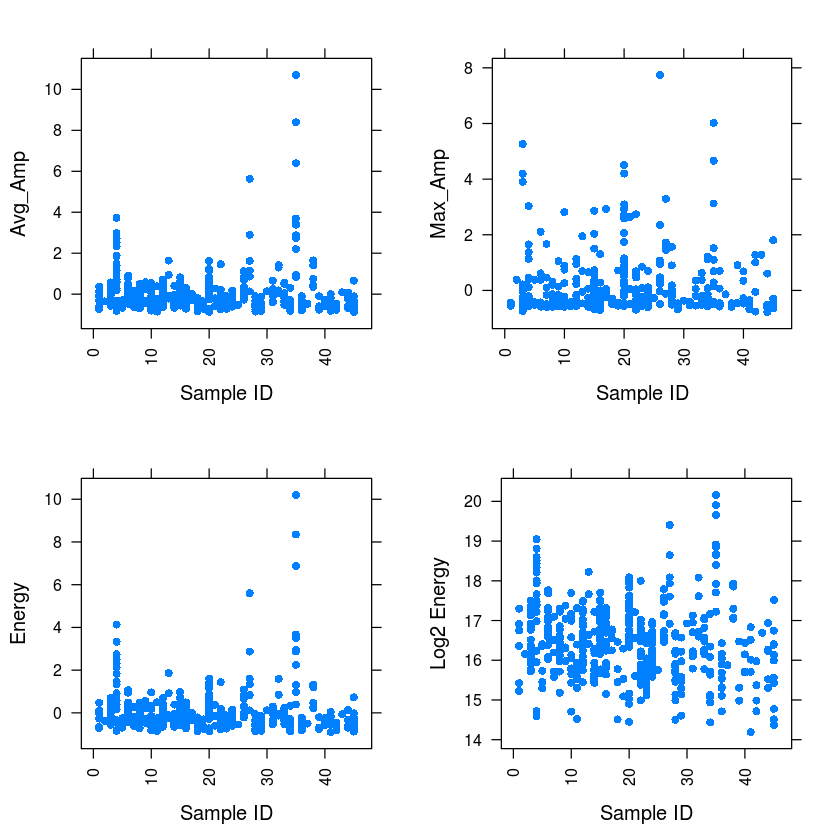

In [6]:
p1 = xyplot(avg_amp ~ sids, pch = 16, color = 'blue',xlab = 'Sample ID', ylab = 'Avg_Amp',
      scales=list(x=list(rot=90)))
p2 = xyplot(max_amp ~ sids, pch = 16, color = 'blue',xlab = 'Sample ID', ylab = 'Max_Amp',
      scales=list(x=list(rot=90)))
p3 = xyplot(energy ~ sids, pch = 16, color = 'blue',xlab = 'Sample ID', ylab = 'Energy',
      scales=list(x=list(rot=90)))
p4 = xyplot(log_energy ~ sids, pch = 16, color = 'blue',xlab = 'Sample ID', ylab = 'Log2 Energy',
      scales=list(x=list(rot=90)))

grid.arrange(p1,p2,p3,p4, ncol=2, nrow = 2)

### Logistic mixed model 

In [7]:
y = as.numeric(df$tremor) - 1
model = glmer(y ~ avg_amp + max_amp + log_energy + (1 | sids ), family = 'binomial',
             control= glmerControl(optimizer="bobyqa"))
              #, optCtrl=list(maxfun=3e5)) 
summary(model)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0344071 (tol = 0.001, component 1)”

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: y ~ avg_amp + max_amp + log_energy + (1 | sids)
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
    77.1     98.3    -33.6     67.1      506 

Scaled residuals: 
      Min        1Q    Median        3Q       Max 
-0.122664 -0.026819  0.001657  0.002593  0.005895 

Random effects:
 Groups Name        Variance Std.Dev.
 sids   (Intercept) 1059     32.54   
Number of obs: 511, groups:  sids, 45

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.474419   0.002073  -711.4   <2e-16 ***
avg_amp     -0.199788   0.002073   -96.4   <2e-16 ***
max_amp     -0.426235   0.002073  -205.6   <2e-16 ***
log_energy   0.807785   0.002074   389.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr) avg_mp max_mp
avg_amp    0.0

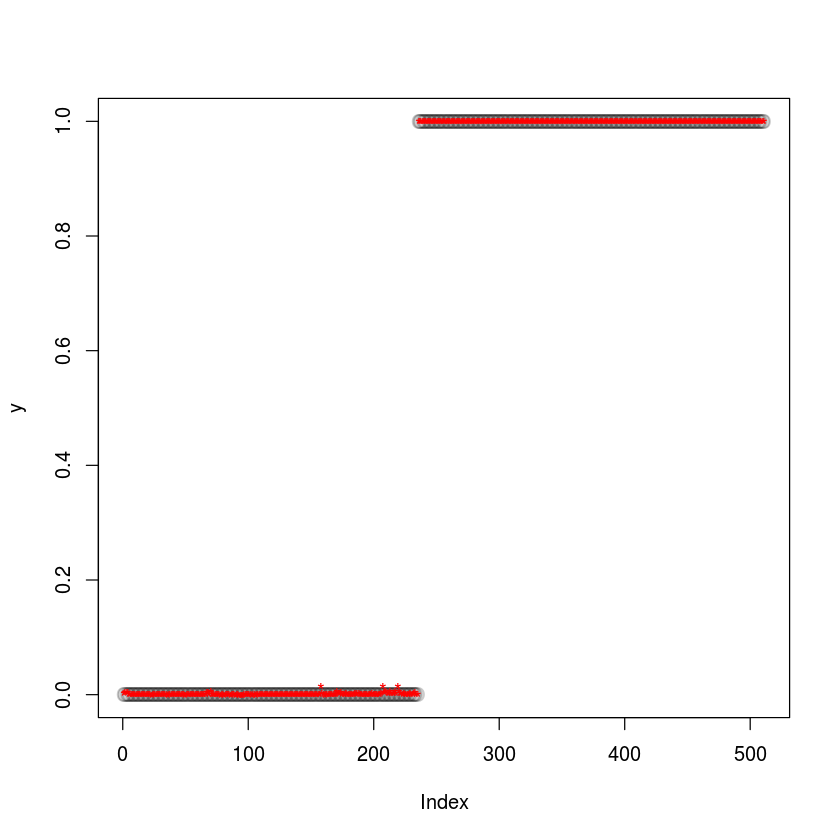

In [8]:
plot(y,pch='O',col=alpha('black',0.2))
points(fitted(model),pch ='*',col='red')

### Linear mixed model

In [9]:
y = as.numeric(df$tremor) - 1
model = lmer(y ~ avg_amp + max_amp + log_energy + (1 | sids ), control= lmerControl(optimizer="bobyqa")
              ,optCtrl=list(maxfun=1e6)) 
summary(model)

Warning message:
“extra argument(s) ‘optCtrl’ disregarded”Warning message in optwrap(optimizer, devfun, getStart(start, rho$lower, rho$pp), :
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.0050319 (tol = 0.002, component 1)”

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ avg_amp + max_amp + log_energy + (1 | sids)
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: -9294

Scaled residuals: 
       Min         1Q     Median         3Q        Max 
-2.498e-04 -1.090e-05  3.904e-06  1.281e-05  1.999e-04 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 sids     (Intercept) 2.192e-02 1.480e-01
 Residual             9.713e-11 9.856e-06
Number of obs: 511, groups:  sids, 45

Fixed effects:
              Estimate Std. Error t value
(Intercept)  5.556e-01  2.207e-02   25.17
avg_amp      9.942e-11  1.082e-06    0.00
max_amp     -6.655e-11  5.921e-07    0.00
log_energy   7.952e-12  1.036e-06    0.00

Correlation of Fixed Effects:
           (Intr) avg_mp max_mp
avg_amp     0.001              
max_amp     0.000 -0.307       
log_energy -0.001 -0.684 -0.091
convergence code: 3
Model failed to converge with max|grad| = 0.0050319 (tol = 0.002, component 1)


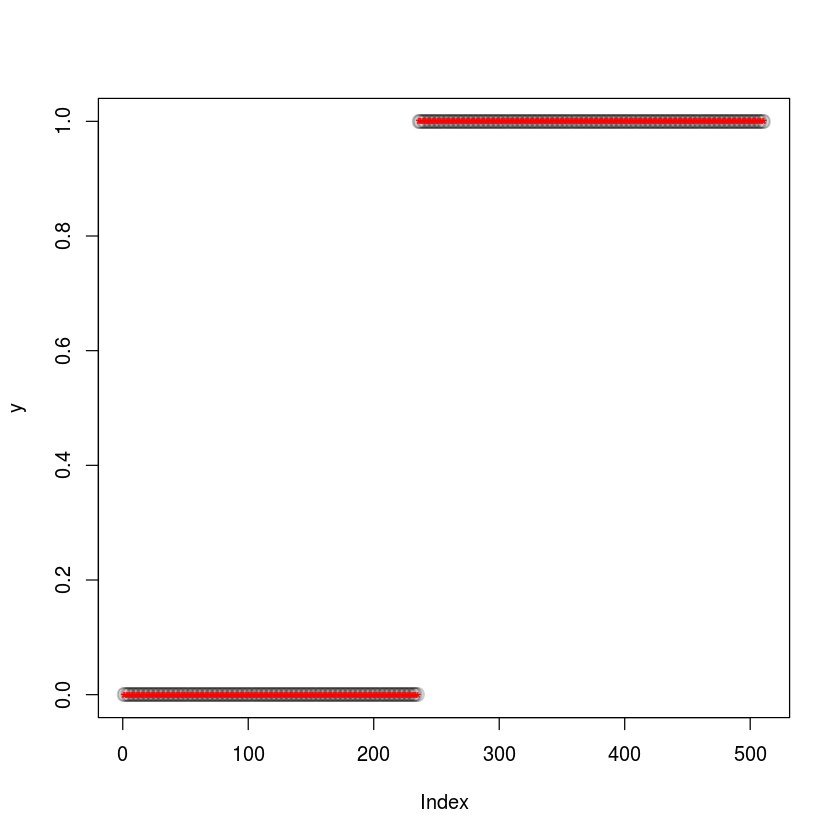

In [10]:
plot(y,pch='O',col=alpha('black',0.2))
points(fitted(model),pch ='*',col='red')


### Logistic model

In [11]:
y = as.numeric(df$tremor) - 1
model = glm(y ~ avg_amp + max_amp + log_energy, family = 'binomial')
summary(model)


Call:
glm(formula = y ~ avg_amp + max_amp + log_energy, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5852  -1.2257   0.7564   1.0854   2.4141  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   9.8841     4.1877   2.360 0.018262 *  
avg_amp       1.2175     0.3441   3.538 0.000403 ***
max_amp      -0.5508     0.1423  -3.871 0.000108 ***
log_energy   -0.5893     0.2535  -2.325 0.020093 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 705.1  on 510  degrees of freedom
Residual deviance: 671.5  on 507  degrees of freedom
AIC: 679.5

Number of Fisher Scoring iterations: 5


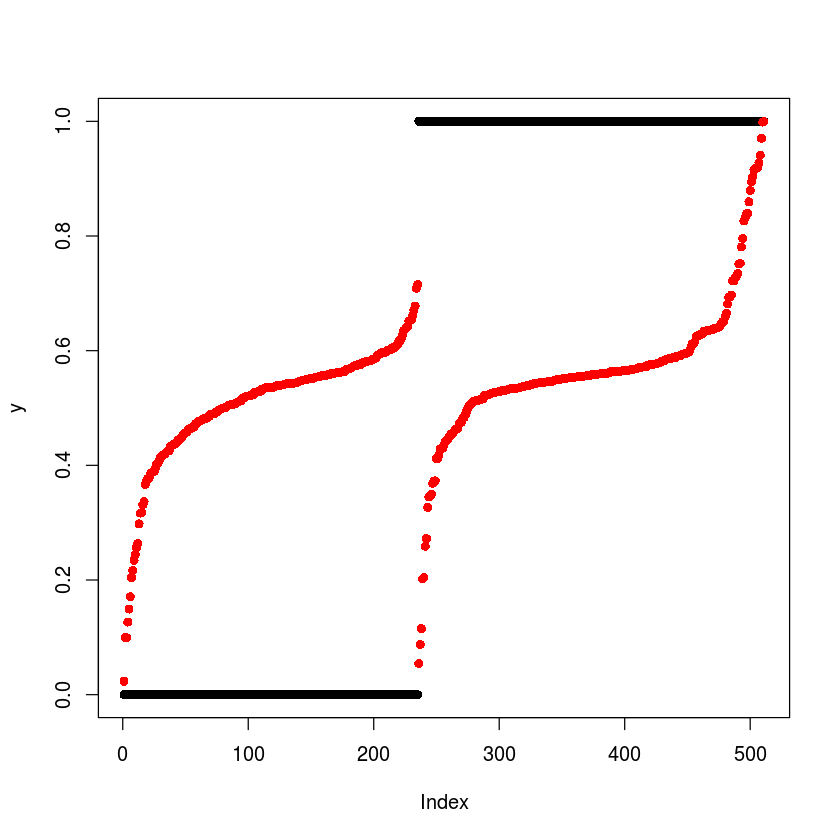

In [12]:
plot(y,pch=16,col='black')
res = fitted(model)
etr = sort(res[which(df$tremor == 'ET')])
pdr = sort(res[which(df$tremor == 'PD')])

res2 = c(etr,pdr)
points(res2,pch =16,col='red')

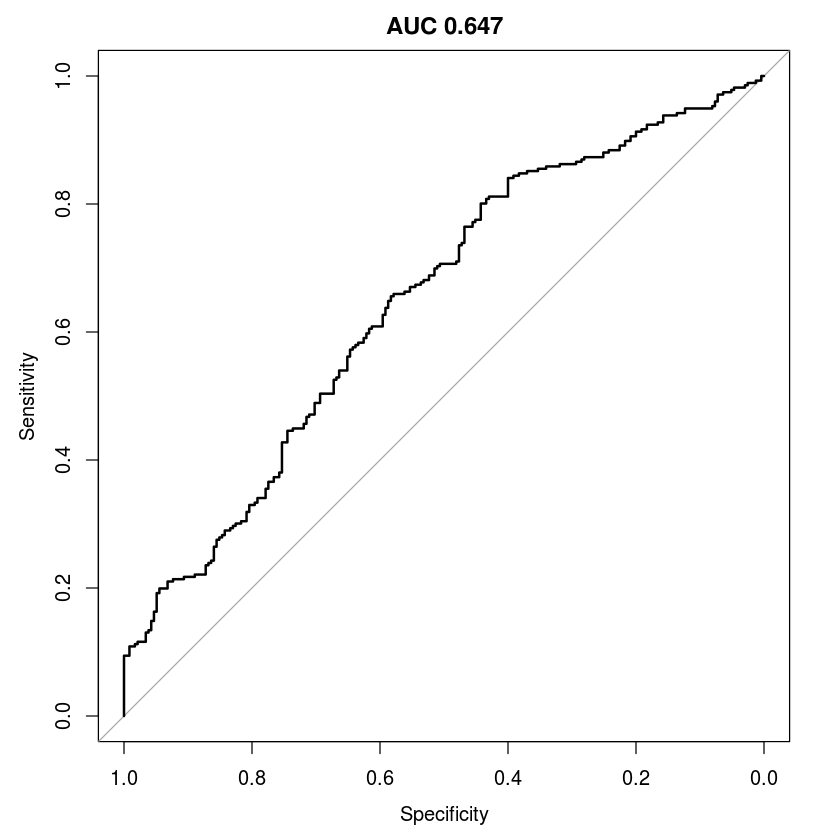

In [13]:
ROC = roc(response = y, predictor = res2)
plot.roc(ROC, main = paste('AUC',round(ROC$auc,4)))

### Linear model

In [14]:
y = as.numeric(df$tremor) - 1
model = lm(y ~ avg_amp + max_amp + log_energy)
summary(model)


Call:
lm(formula = y ~ avg_amp + max_amp + log_energy)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6523 -0.5384  0.3253  0.4447  1.0399 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.56938    0.69863   2.246   0.0251 *  
avg_amp      0.15552    0.03932   3.955 8.74e-05 ***
max_amp     -0.10824    0.02562  -4.225 2.84e-05 ***
log_energy  -0.06257    0.04245  -1.474   0.1411    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4872 on 507 degrees of freedom
Multiple R-squared:  0.05175,	Adjusted R-squared:  0.04614 
F-statistic: 9.224 on 3 and 507 DF,  p-value: 5.977e-06


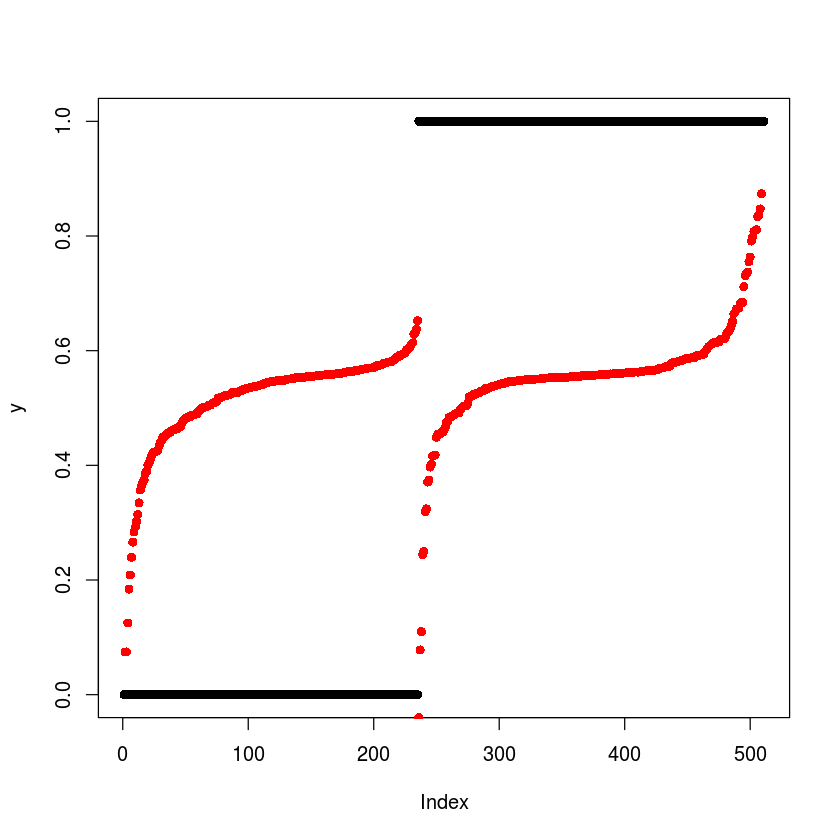

In [15]:
plot(y,pch=16,col='black')
res = fitted(model)
etr = sort(res[which(df$tremor == 'ET')])
pdr = sort(res[which(df$tremor == 'PD')])

res2 = c(etr,pdr)
points(res2,pch =16,col='red')

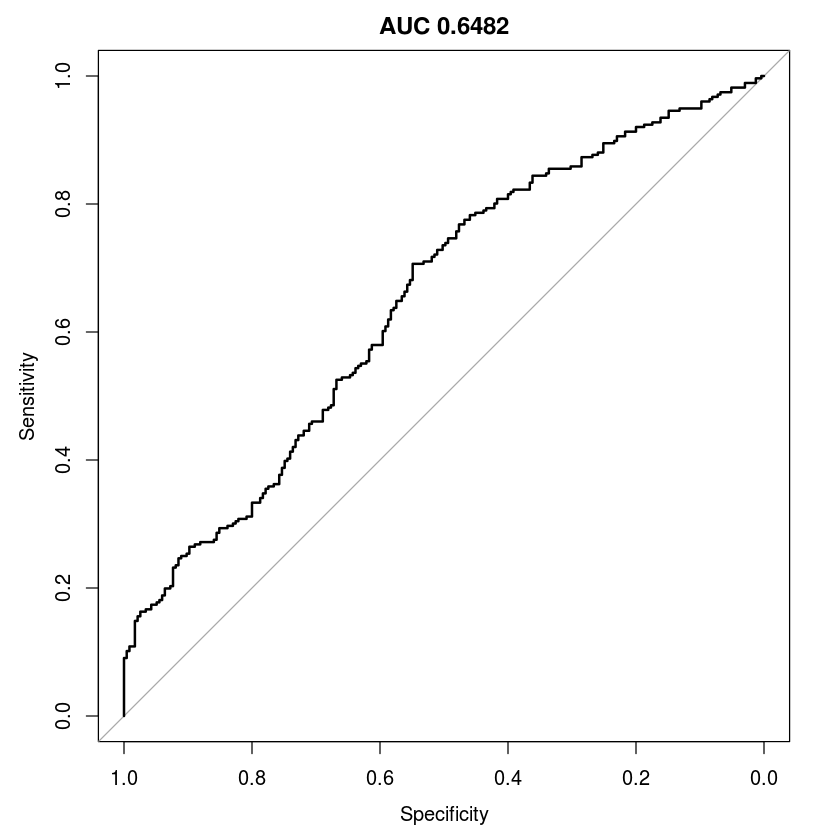

In [16]:
ROC = roc(response = y, predictor = res2)
plot.roc(ROC, main = paste('AUC',round(ROC$auc,4)))

### Logistic model with random sampling

In [17]:
ss = unique(sids)
COEFF = c(0,0,0,0)
for (i in seq(10000))
    {
        rows = c()
        for (i in ss)
            {dis = which(sids == i)
             row_num = sample(dis,1)
             rows = c(rows,row_num)
            }

        sub_df = df[rows,]
        log_energy = log(sub_df$energy)
        y = as.numeric(sub_df$tremor) - 1
        model = glm(y ~ sub_df$avg_amp + sub_df$max_amp + log_energy, family = 'binomial')
        coeffs = model$coefficients
        COEFF = rbind(COEFF,coeffs)
    
    }

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning mess

In [18]:
COEFF = COEFF[-1,]

In [19]:
COEFF = as.data.frame(COEFF)
average_coeffs = sapply(COEFF,mean)

In [20]:
average_coeffs

(Intercept) sub_df$avg_amp sub_df$max_amp     log_energy 
    8.38103570     0.06334942    -0.00414043    -0.69466019

In [21]:
y = as.numeric(df$tremor) - 1
log_energy = log(df$energy)
model = glm(y ~ avg_amp + max_amp + log_energy, family = 'binomial')
model$coefficients = average_coeffs

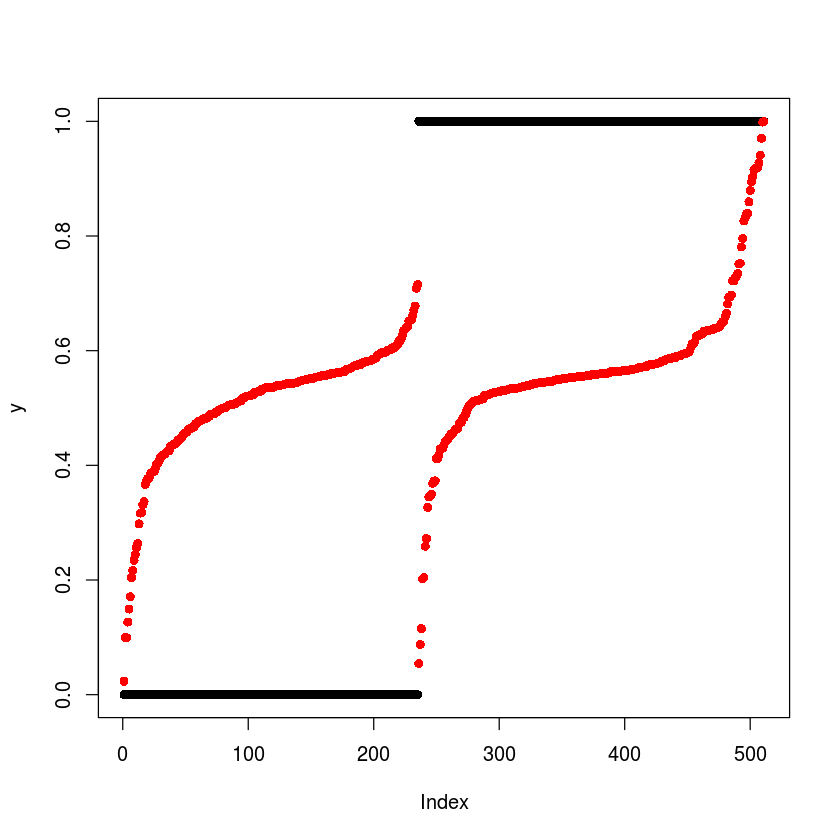

In [22]:
plot(y,pch=16,col='black')
res = fitted(model)
etr = sort(res[which(df$tremor == 'ET')])
pdr = sort(res[which(df$tremor == 'PD')])

res2 = c(etr,pdr)
points(res2,pch =16,col='red')

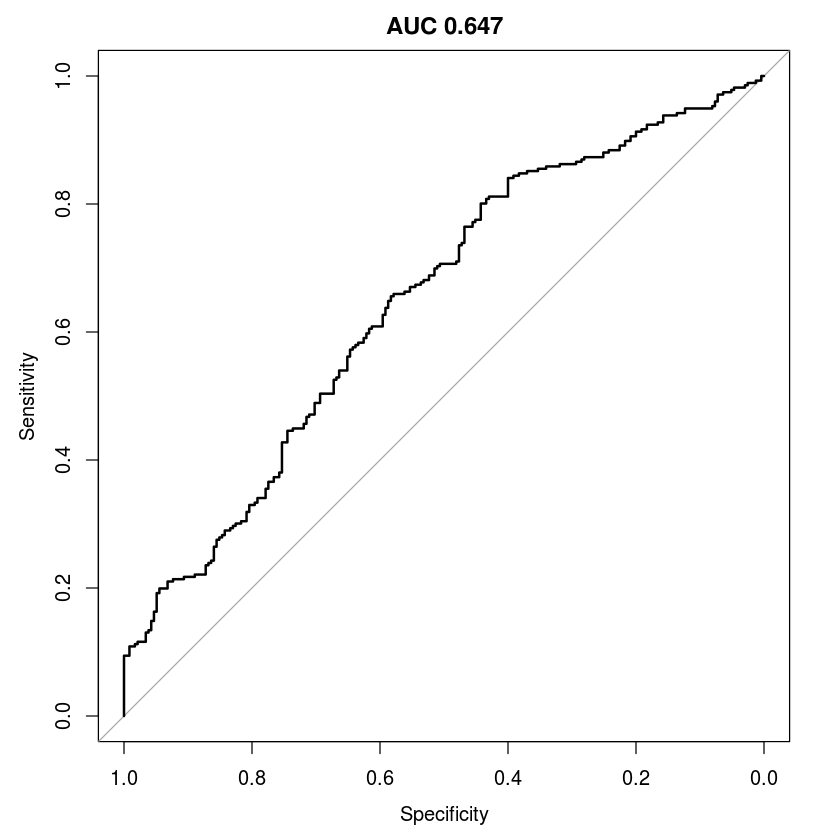

In [23]:
ROC = roc(response = y, predictor = res2)
plot.roc(ROC, main = paste('AUC',round(ROC$auc,4)))